In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [40]:
df = pd.read_csv("results2feat_2worlds_0.1endA.csv")

In [45]:
df.groupby(["Features", "errRange", "n_samples"]).agg({"skl":[np.mean,np.std],
                                                                "post_hoc":[np.mean,np.std],
                                                                "uncertain_forest":[np.mean,np.std],
                                                                "random_forest":[np.mean,np.std],
                                                                "lasso":[np.mean,np.std],
                                                                "ridge":[np.mean,np.std]})

skl            post_hoc            \
                                 mean       std      mean       std   
Features errRange n_samples                                           
2        0.0      5          0.751705  0.135124  0.751705  0.135124   
                  10         0.850650  0.095826  0.850650  0.095826   
                  20         0.908145  0.073609  0.908145  0.073609   
                  40         0.953179  0.041463  0.953179  0.041463   
         0.1      5          0.721686  0.126375  0.722467  0.124794   
                  10         0.804292  0.084615  0.799747  0.083131   
                  20         0.856542  0.058097  0.850108  0.058196   
                  40         0.895755  0.043028  0.884759  0.038620   
         0.2      5          0.671888  0.116745  0.667917  0.118428   
                  10         0.761521  0.083606  0.735791  0.084024   
                  20         0.805820  0.065290  0.776515  0.062923   
                  40         0.823915  0.048962  0.776982  0.051563   
         0.3      5          0.623605  0.122473  0.612280  0.111810   
                  10         0.702367  0.093377  0.655312  0.087955   
                  20         0.744817  0.075556  0.684217  0.083670   
                  40         0.774347  0.063890  0.688967  0.070791   
         0.4      5          0.586950  0.123315  0.571688  0.124842   
                  10         0.650329  0.114392  0.598262  0.113845   
                  20         0.695000  0.076762  0.616891  0.098899   
                  40         0.725402  0.065242  0.631236  0.069031   
         0.5      5          0.605733  0.120235  0.578748  0.132374   
                  10         0.612705  0.122216  0.559535  0.114447   
                  20         0.678345  0.096442  0.582483  0.102464   
                  40         0.683392  0.091951  0.584338  0.079452   
         0.6      5          0.612136  0.124198  0.584556  0.137677   
                  10         0.594036  0.127299  0.535039  0.114942   
                  20         0.614721  0.107298  0.542386  0.119010   
                  40         0.664721  0.088115  0.535633  0.088853   
         0.7      5          0.599183  0.116117  0.579217  0.130556   
                  10         0.594612  0.133381  0.544935  0.120696   
                  20         0.629488  0.127444  0.519383  0.126544   
                  40         0.592924  0.111241  0.515726  0.089082   
         0.8      5          0.584088  0.133914  0.574941  0.127808   
                  10         0.573630  0.136639  0.533882  0.125667   
                  20         0.612441  0.122610  0.516580  0.109279   
                  40         0.596421  0.113030  0.520512  0.094934   
         0.9      5          0.569902  0.144796  0.563567  0.125960   
                  10         0.561882  0.162739  0.538406  0.145061   
                  20         0.571602  0.144181  0.511118  0.120862   
                  40         0.597494  0.120167  0.536477  0.090268   
         1.0      5          0.570098  0.149776  0.568341  0.128478   
                  10         0.558447  0.154165  0.537455  0.150508   
                  20         0.583712  0.127669  0.509071  0.114142   
                  40         0.582698  0.134438  0.520302  0.117794   

                            uncertain_forest           random_forest  \
                                        mean       std          mean   
Features errRange n_samples                                            
2        0.0      5                 0.746992  0.113386      0.727853   
                  10                0.861276  0.082907      0.824056   
                  20                0.910292  0.075349      0.899227   
                  40                0.953768  0.036763      0.949580   
         0.1      5                 0.728973  0.107185      0.714547   
                  10                0.818574  0.079898      0.782897   
                  20                0.868474  0.

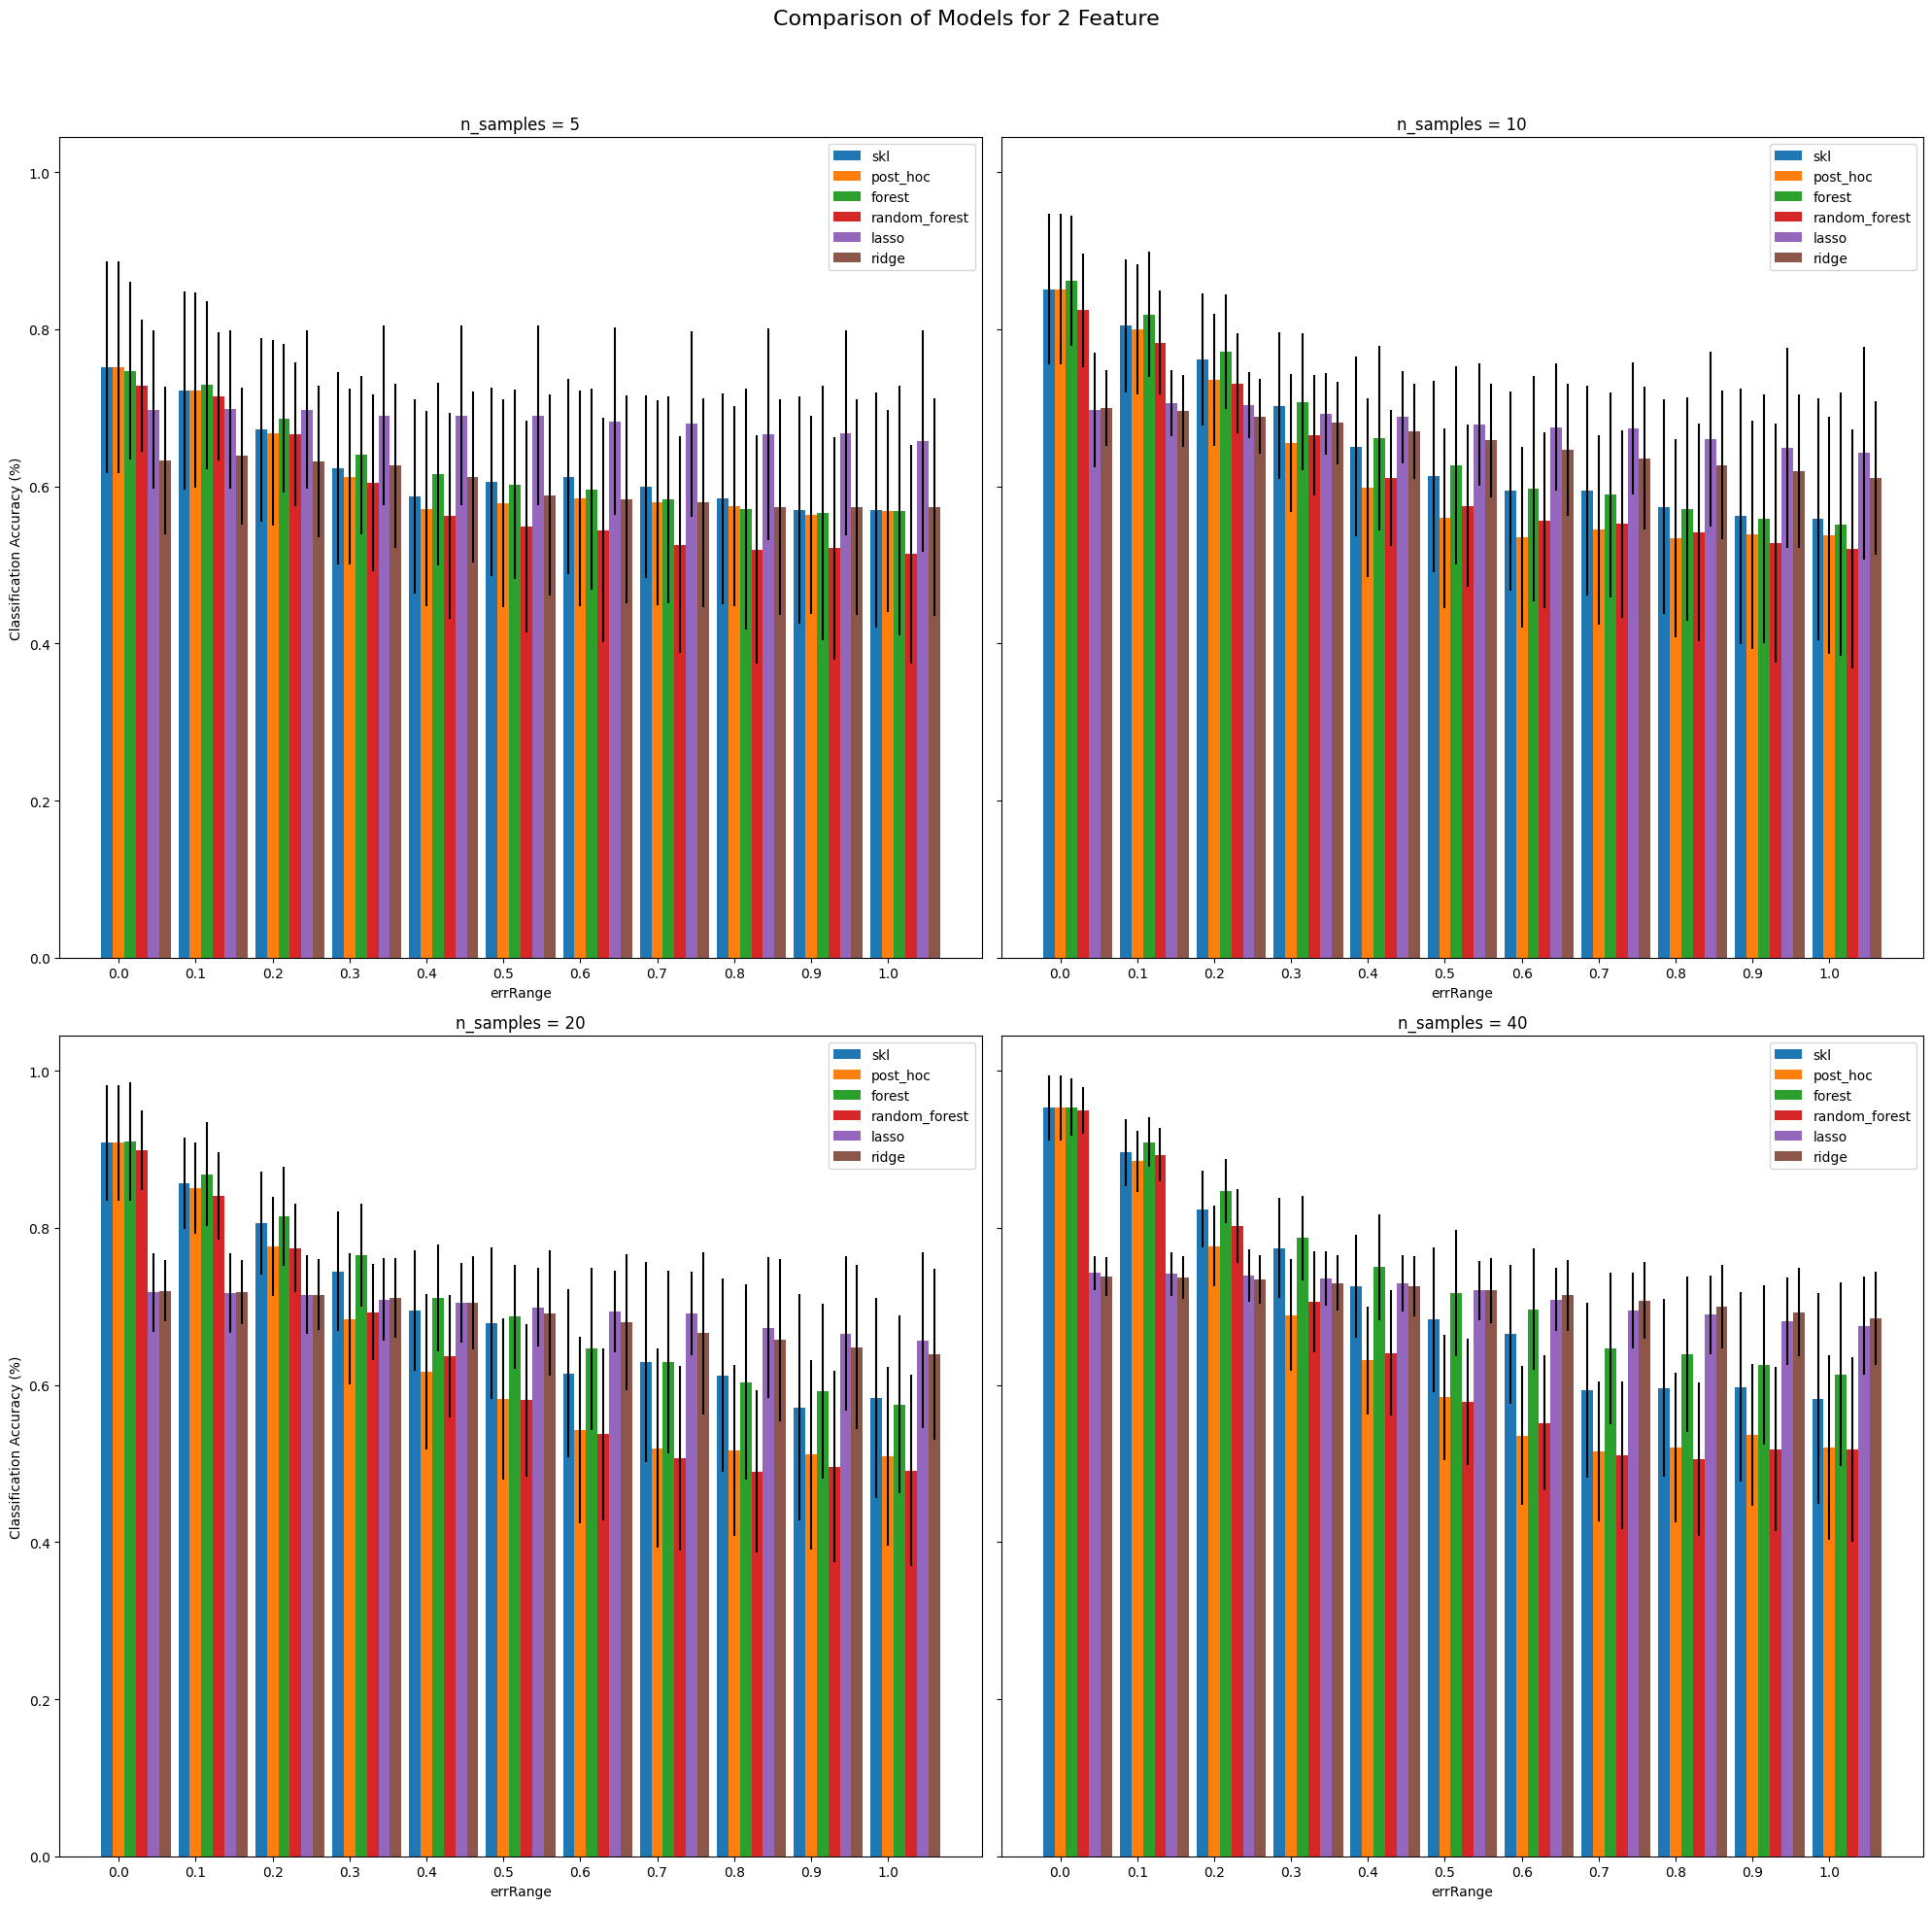

In [46]:


df = pd.read_csv("results2feat_2worlds_0.1endA.csv")

df = df.groupby(["Features", "errRange", "n_samples"]).agg({"skl":[np.mean,np.std],
                                                                "post_hoc":[np.mean,np.std],
                                                                "uncertain_forest":[np.mean,np.std],
                                                                "random_forest":[np.mean,np.std],
                                                                "lasso":[np.mean,np.std],
                                                                "ridge":[np.mean,np.std]}).reset_index()

import numpy as np
import matplotlib.pyplot as plt

# Loop through each feature
for feature in df['Features'].unique():
    feature_data = df[df['Features'] == feature]

    # Create a figure with 4 subplots in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=True)
    fig.suptitle(f'Comparison of Models for {feature} Feature', fontsize=16)

    # Flatten axes array to easily iterate over it
    axes = axes.flatten()

    for i, samples in enumerate(np.unique(df["n_samples"])):
        samples_data = feature_data[feature_data['n_samples'] == samples]

        # Prepare data for plotting
        x = samples_data['errRange']
        skl_means = samples_data[('skl', 'mean')]
        skl_stds = samples_data[('skl', 'std')]
        post_hoc_means = samples_data[('post_hoc', 'mean')]
        post_hoc_stds = samples_data[('post_hoc', 'std')]
        forest_means = samples_data[('uncertain_forest', 'mean')]
        forest_stds = samples_data[('uncertain_forest', 'std')]
        random_forest_means = samples_data[('random_forest', 'mean')]
        random_forest_stds = samples_data[('random_forest', 'std')]
        lasso_means = samples_data[('lasso', 'mean')]
        lasso_stds = samples_data[('lasso', 'std')]
        ridge_means = samples_data[('ridge', 'mean')]
        ridge_stds = samples_data[('ridge', 'std')]

        # Plotting
        bar_width = 0.15
        bar1 = np.arange(len(x))
        bar2 = [i + bar_width for i in bar1]
        bar3 = [i + bar_width for i in bar2]
        bar4 = [i + bar_width for i in bar3]
        bar5 = [i + bar_width for i in bar4]
        bar6 = [i + bar_width for i in bar5]

        axes[i].bar(bar1, skl_means, yerr=skl_stds, width=bar_width, label='skl')
        axes[i].bar(bar2, post_hoc_means, yerr=post_hoc_stds, width=bar_width, label='post_hoc')
        axes[i].bar(bar3, forest_means, yerr=forest_stds, width=bar_width, label='forest')
        axes[i].bar(bar4, random_forest_means, yerr=random_forest_stds, width=bar_width, label='random_forest')
        axes[i].bar(bar5, lasso_means, yerr=lasso_stds, width=bar_width, label='lasso')
        axes[i].bar(bar6, ridge_means, yerr=ridge_stds, width=bar_width, label='ridge')

        axes[i].set_xlabel('errRange')
        axes[i].set_title(f'n_samples = {samples}')
        axes[i].set_xticks([r + bar_width for r in range(len(x))])
        axes[i].set_xticklabels(x)
        axes[i].legend()

    # Set the label for the y-axis on the first plot
    axes[0].set_ylabel('Classification Accuracy (%)')
    axes[2].set_ylabel('Classification Accuracy (%)')

    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()


In [35]:
df

Features errRange n_samples       skl            post_hoc            \
                                    mean       std      mean       std   
0         2      0.0         5  0.751705  0.135124  0.751705  0.135124   
1         2      0.0        10  0.850650  0.095826  0.850650  0.095826   
2         2      0.0        20  0.908145  0.073609  0.908145  0.073609   
3         2      0.0        40  0.953179  0.041463  0.953179  0.041463   
4         2      0.1         5  0.721686  0.126375  0.722467  0.124794   
5         2      0.1        10  0.804292  0.084615  0.799747  0.083131   
6         2      0.1        20  0.856542  0.058097  0.850108  0.058196   
7         2      0.1        40  0.895755  0.043028  0.884759  0.038620   
8         2      0.2         5  0.671888  0.116745  0.667917  0.118428   
9         2      0.2        10  0.761521  0.083606  0.735791  0.084024   
10        2      0.2        20  0.805820  0.065290  0.776515  0.062923   
11        2      0.2        40  0.823915  0.048962  0.776982  0.051563   
12        2      0.3         5  0.623605  0.122473  0.612280  0.111810   
13        2      0.3        10  0.702367  0.093377  0.655312  0.087955   
14        2      0.3        20  0.744817  0.075556  0.684217  0.083670   
15        2      0.3        40  0.774347  0.063890  0.688967  0.070791   
16        2      0.4         5  0.586950  0.123315  0.571688  0.124842   
17        2      0.4        10  0.650329  0.114392  0.598262  0.113845   
18        2      0.4        20  0.695000  0.076762  0.616891  0.098899   
19        2      0.4        40  0.725402  0.065242  0.631236  0.069031   
20        2      0.5         5  0.605733  0.120235  0.578748  0.132374   
21        2      0.5        10  0.612705  0.122216  0.559535  0.114447   
22        2      0.5        20  0.678345  0.096442  0.582483  0.102464   
23        2      0.5        40  0.683392  0.091951  0.584338  0.079452   
24        2      0.6         5  0.612136  0.124198  0.584556  0.137677   
25        2      0.6        10  0.594036  0.127299  0.535039  0.114942   
26        2      0.6        20  0.614721  0.107298  0.542386  0.119010   
27        2      0.6        40  0.664721  0.088115  0.535633  0.088853   
28        2      0.7         5  0.599183  0.116117  0.579217  0.130556   
29        2      0.7        10  0.594612  0.133381  0.544935  0.120696   
30        2      0.7        20  0.629488  0.127444  0.519383  0.126544   
31        2      0.7        40  0.592924  0.111241  0.515726  0.089082   
32        2      0.8         5  0.584088  0.133914  0.574941  0.127808   
33        2      0.8        10  0.573630  0.136639  0.533882  0.125667   
34        2      0.8        20  0.612441  0.122610  0.516580  0.109279   
35        2      0.8        40  0.596421  0.113030  0.520512  0.094934   
36        2      0.9         5  0.569902  0.144796  0.563567  0.125960   
37        2      0.9        10  0.561882  0.162739  0.538406  0.145061   
38        2      0.9        20  0.571602  0.144181  0.511118  0.120862   
39        2      0.9        40  0.597494  0.120167  0.536477  0.090268   
40        2      1.0         5  0.570098  0.149776  0.568341  0.128478   
41        2      1.0        10  0.558447  0.154165  0.537455  0.150508   
42        2      1.0        20  0.583712  0.127669  0.509071  0.114142   
43        2      1.0        40  0.582698  0.134438  0.520302  0.117794   

   uncertain_forest           random_forest               lasso            \
               mean       std          mean       std      mean       std   
0          0.746992  0.113386      0.727853  0.084146  0.697658  0.100582   
1          0.861276  0.082907      0.824056  0.071885  0.697309  0.072992   
2          0.910292  0.075349      0.899227  0.050609  0.718124  0.050099   
3          0.953768  0.036763      0.949580  0.029341  0.742483  0.021451   
4          0.728973  0.107185      0.714547  0.081491  0.697945  0.100568   
5          0.818574  0.079898      0.782897  0.066319  0.70

In [21]:
from copy import copy
def generate_world_bounds(features, feature_bounds = (0, 1), endT = .20, endA = .40, max_depth = 100, depth = 0, current_bounds = None):
    if type(features) is int:
        features = np.arange(features)
    if type(feature_bounds) is tuple and len(feature_bounds) == 2:
        feature_bounds = [feature_bounds for _ in range(len(features))]
    if len(features) != len(feature_bounds):
        print(f"features {features} and feature_bounds {feature_bounds} not the same size")
        return
    if current_bounds is None:
        current_bounds = copy(feature_bounds)
    
    args = {"features": features,
            "feature_bounds": feature_bounds,
            "endT": endT,
            "endA": endA,
            "max_depth": max_depth,
            }
    bounds = set()

    feature = random.randint(0, len(features) - 1)
    start, end = current_bounds[feature]
    f_start, f_end = feature_bounds[feature]
    random_offset = (f_end - f_start) * endT
    start_random, end_random = start + random_offset, end - random_offset
    if end_random <= start_random or \
            depth > max_depth or \
            np.multiply.reduce([b - a for a, b in feature_bounds]) * endA > np.multiply.reduce([b - a for a, b in current_bounds]):
        return {tuple(current_bounds)}
 
    cut = random.uniform(start_random, end_random)
    
    current_bounds[feature] = (start, cut)
    bounds |= generate_world_bounds(current_bounds = copy(current_bounds), depth = depth + 1, **args)
    
    current_bounds[feature] = (cut, end)
    bounds |= generate_world_bounds(current_bounds = copy(current_bounds), depth = depth + 1, **args)
    return bounds

def generate_true_values(bounds_with_class, feature_bounds):
    if type(feature_bounds) is tuple and len(feature_bounds) == 2:
        feature_bounds = [feature_bounds for _ in range(len(list(bounds_with_class.items())[0][0]))]
    points = []
    for _ in range(10**4):
        val = [random.uniform(feature_bounds[i][0], feature_bounds[i][1]) for i in range(len(feature_bounds))]
        for bounds, cls in bounds_with_class.items():
            if all([start < val[i] < end for i, (start, end) in enumerate(bounds)]):
                points.append(np.array([cls] + val))
    return np.array(points)

corr_dict = {
    0.57: -0.25,
    0.60: -0.1,
    0.65: 0, 
    0.70: 0.065,
    0.75: 0.135,
    0.80: 0.215,
    0.85: 0.305,
    0.90: 0.41,
    0.95: 0.56,
    1: 1, 
}
def add_unc(tv, errRange = 1, corr = 1):
    err = errRange * random.random() * [-1,+1][random.randint(0,1)]
    ov = tv + err * random.uniform(corr_dict[corr] , 1)
    unc = abs(err)
    return ov, unc

def data_to_world(data, errRange = 1, corr = 1):
    _, n_feat = data.shape
    n_feat -= 1
    args = {
        "errRange": errRange,
        "corr" : corr
    }
    arr = []
    i = 0
    arr.append(data[:, i])
    i += 1
    for _ in range(n_feat):
        arr.append(data[:, i])
        i += 1

    for i in range(n_feat):
        ovunc = np.array([add_unc(tv, **args) for tv in data[:, i + 1]])
        arr.append(ovunc[:, 0]) 
        arr.append(ovunc[:, 1])

    #True Value 1, True Value 2, Class, Observed Value 1, Uncertainty 1, Observed Value 2, Uncertainty 2
    return np.stack(arr, axis=1)

def generate_world(seed, features, feature_bounds = (0, 1), endT = .2, endA = .1, max_depth = 4, class_number = 2, errRange = 0.1, corr = 1):
    random.seed(seed) # 2427
    world_coords = generate_world_bounds(features = features, feature_bounds = feature_bounds, endT = endT, endA = endA, max_depth = max_depth)
    bounds_with_class = {}
    random_list = list(np.arange(class_number)) + [random.randint(0, class_number - 1) for _ in range(len(world_coords) - class_number)]
    np.random.shuffle(random_list)
    for i, bounds in zip(random_list, world_coords):
        bounds_with_class[bounds] = i
    data = generate_true_values(bounds_with_class, feature_bounds)
    
    return data_to_world(data, errRange = errRange, corr = corr)

def plot_3d_world(world, cmap='viridis'):
    import matplotlib.pyplot as plt
    
    # Extracting data for the 3D plot
    classes_3d = world[:, 0]
    f1 = world[:, 1]
    f2 = world[:, 2]
    f3 = world[:, 3]

    # Creating subplots with different viewing angles
    fig = plt.figure(figsize=(20, 8))

    # First 3D Plot - Default view
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(f1, f2, f3, c=classes_3d, cmap=cmap, edgecolor='k')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_zlabel('Feature 3')
    ax1.set_title('True World - Default View')

    # Second 3D Plot - Different view angle
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(f1, f2, f3, c=classes_3d, cmap=cmap, edgecolor='k')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_zlabel('Feature 3')
    ax2.set_title('True World - Rotated View')
    ax2.view_init(elev=30., azim=120)  # Changing the elevation and azimuth

    # Display the combined plots
    plt.show()
    
def draw_true_world(data, cmap='viridis'):
    import matplotlib.pyplot as plt
    
    classes = data[:, 0]
    x = data[:, 1]
    y = data[:, 2]

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=classes, cmap=cmap, edgecolor='k')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Points by Class')
    plt.show()
    
def draw_world_from_seed(seed, features, NUMBER_OF_CLASSES, endT = .2, endA = .3, max_depth = 4):
    np.random.seed(seed)
    world = generate_world(seed, features, 
                           feature_bounds = (0, 1), 
                           endT = endT, endA = endA, max_depth = max_depth,
                           class_number = NUMBER_OF_CLASSES,
                           errRange = 1, corr = 1)
    if features == 3:
        plot_3d_world(world)
    else:
        draw_true_world(world)

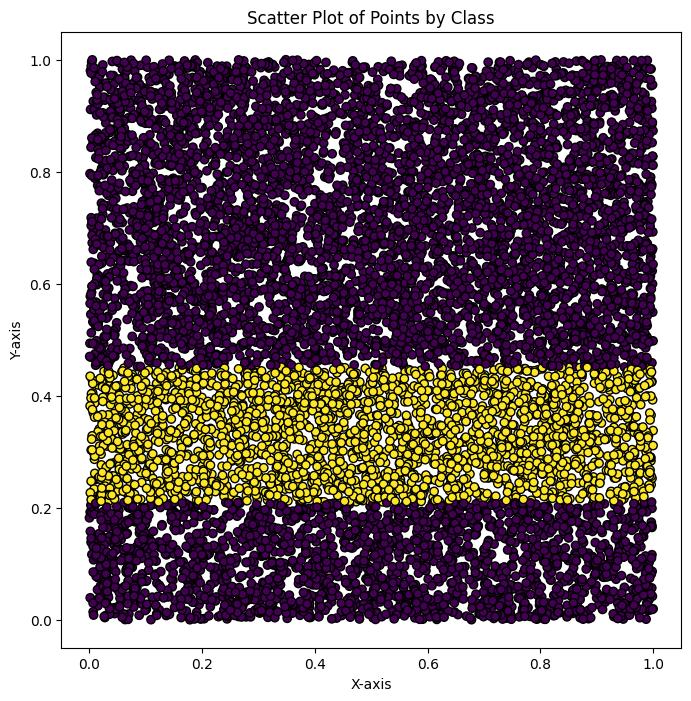

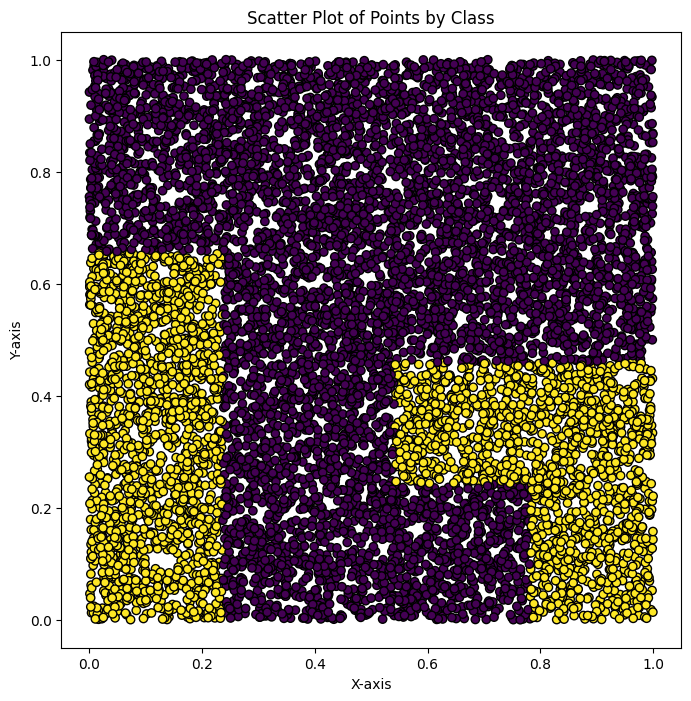

In [47]:
for seed in range(2):
    draw_world_from_seed(seed, features = 2, NUMBER_OF_CLASSES = 2, endT = .2, endA = .1, max_depth = 4)